## Some Post-Checks

In [34]:
sizes=[]
for d in alld:
    sizes.append(d.shape)

In [35]:
import numpy as np

In [36]:
m=np.concatenate(sizes)

(0, 1)

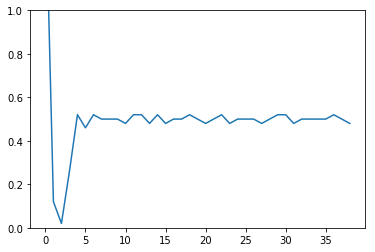

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m[2::2]/5000)
plt.ylim((0, 1))

In [38]:
allm

[[(0.4388, 'S 34')],
 [(0.199, 'S  2')],
 [(0.123, 'S  2'), (0.299, 'S 34')],
 [(0.123, 'S  2'), (0.299, 'S 34')],
 [(0.021, 'S 18'), (0.213, 'S  2'), (0.437, 'S 18')],
 [(0.021, 'S 18'), (0.213, 'S  2'), (0.437, 'S 18')],
 [(0.021, 'S 18'), (0.213, 'S  2'), (0.437, 'S 18')],
 [(0.329, 'S  2')],
 [(0.167, 'S 34')],
 [(0.219, 'S 34'), (0.443, 'S  2')],
 [(0.219, 'S 34'), (0.443, 'S  2')],
 [(0.515, 'S  2')],
 [(0.233, 'S 34')],
 [(0.493, 'S  2')]]

# Load in / convert Data to .fif format

In [39]:
import struct
import json
fhe=open('testnew1.eeg')
fhm=open('testnew1.marker')
fhj=open('testnew1.meta')

### json = header

In [40]:
meta=json.load(fhj)
print(meta)

{'Channels': ['Ch-1', 'Ch-2', 'Ch-3', 'Ch-4', 'Ch-5', 'Ch-6', 'Ch-7', 'Ch-8', 'Ch-9', 'Ch-10', 'Ch-11', 'Ch-12', 'Ch-13', 'Ch-14', 'Ch-15', 'Ch-16', 'Ch-17', 'Ch-18', 'Ch-19', 'Ch-20', 'Ch-21', 'Ch-22', 'Ch-23', 'Ch-24', 'Ch-25', 'Ch-26', 'Ch-27', 'Ch-28', 'Ch-29', 'Ch-30', 'Ch-31', 'Ch-32', 'Ch-33', 'Ch-34', 'Ch-35', 'Ch-36', 'Ch-37', 'Ch-38', 'Ch-39', 'Ch-40', 'Ch-41', 'Ch-42', 'Ch-43', 'Ch-44', 'Ch-45', 'Ch-46', 'Ch-47', 'Ch-48', 'Ch-49', 'Ch-50', 'Ch-51', 'Ch-52', 'Ch-53', 'Ch-54', 'Ch-55', 'Ch-56', 'Ch-57', 'Ch-58', 'Ch-59', 'Ch-60', 'Ch-61', 'Ch-62', 'Ch-63', 'Ch-64'], 'Sampling Frequency': 5000, 'Amp': '<libmushu.driver.brainproducts.BPAmp object at 0x7f5de4a4c748>'}


### binary = raw data

In [42]:
import numpy as np

f = open("testnew1.eeg", "r")
a = np.fromfile(f, dtype=np.float32)

In [43]:
len(a)/5000/64

45.76

In [44]:
m=a.reshape(round(len(a)/64),64)

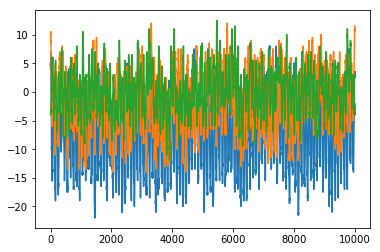

In [56]:
import matplotlib.pyplot as plt
plt.plot(m[30000:40000,1:4])

In [46]:
import mne

In [47]:
# Generate some random data

# Initialize an info structure
info = mne.create_info(
    ch_names=meta['Channels'],
    ch_types = ['eeg' for i in range(64)],
    sfreq=meta['Sampling Frequency']
)

custom_raw = mne.io.RawArray(m.transpose(), info)
print(custom_raw)

Creating RawArray with float64 data, n_channels=64, n_times=228800
    Range : 0 ... 228799 =      0.000 ...    45.760 secs
Ready.
<RawArray  |  None, n_channels x n_times : 64 x 228800 (45.8 sec), ~111.8 MB, data loaded>


### markers

In [48]:
with open('testnew1.marker') as file:
    content = file.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print(content)

import re

# create the marker matrix
ev_arr=[]
for i, item in enumerate(content):
    out=re.split("[\s|S|T]+", item)
    sample = int(float(out[0])/1000*meta['Sampling Frequency'])
    code = int(out[1])
    
    print(out)
    ev_arr.append([sample, 0, code])
    


# create marker channel for MNE python:
info = mne.create_info(['STI'], custom_raw.info['sfreq'], ['stim'])
stim_data = np.zeros((1, len(custom_raw.times)))
stim_raw = mne.io.RawArray(stim_data, info)
custom_raw.add_channels([stim_raw], force_update_info=True)

# create the marker matrix:
custom_raw.add_events(ev_arr)



['33260.438800 S 34', '33780.199000 S  2', '34260.123000 S  2', '34260.299000 S 34', '35260.021000 S 18', '35260.213000 S  2', '35260.437000 S 18', '35780.329000 S  2', '36280.167000 S 34', '36760.219000 S 34', '36760.443000 S  2', '37260.515000 S  2', '37780.233000 S 34', '38260.493000 S  2']
['33260.438800', '34']
['33780.199000', '2']
['34260.123000', '2']
['34260.299000', '34']
['35260.021000', '18']
['35260.213000', '2']
['35260.437000', '18']
['35780.329000', '2']
['36280.167000', '34']
['36760.219000', '34']
['36760.443000', '2']
['37260.515000', '2']
['37780.233000', '34']
['38260.493000', '2']
Creating RawArray with float64 data, n_channels=1, n_times=228800
    Range : 0 ... 228799 =      0.000 ...    45.760 secs
Ready.


In [50]:
custom_raw.save('testnew1_raw.fif',overwrite=True)

Writing /home/nfcontrol/repos/rt-cwl-eeg-fmri/mushu/testnew1_raw.fif
Closing /home/nfcontrol/repos/rt-cwl-eeg-fmri/mushu/testnew1_raw.fif [done]
